In [37]:
#pip install tradingeconomics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tradingeconomics as te
from dotenv import load_dotenv
import plotly.express as px
from IPython.display import Image
import os


api_key = os.getenv('TRADING_ECONOMICS_API_KEY')
te.login(api_key)
load_dotenv() 

True

Data Exploratory

In [45]:
try:
    commodities_data = te.getMarketsData(marketsField='commodities', output_type='df') 
except Exception as e:
    print("Error fetching commodities data:", e)
commodities_data

,Symbol,Ticker,Name,Country,Date,State,Last,Close,CloseDate,Group,...,yesterday,lastWeek,lastMonth,lastYear,startYear,decimals,unit,frequency,StartDate,LastUpdate
0,C 1:COM,C A,Corn,commodity,2024-06-04T17:28:24.29,OPEN,443.1601,443.1601,2024-06-04T17:28:00,Agricultural,...,443.5000,462.5000,469.0000,530.2500,471.2500,4.0,USd/BU,Live,1912-05-01T00:00:00,2024-06-04T17:28:00
1,IUC:COM,IUC,Indium,commodity,2024-06-04T00:00:00,CLOSED,3075.0000,3075.0000,2024-06-04T00:00:00,Industrial,...,3075.0000,3075.0000,2675.0000,1495.0000,2005.0000,0.0,CNY/Kg,daily,2017-11-24T00:00:00,2024-06-04T15:54:00
2,MVNLRTR:IND,MVNLRTR,Nuclear Energy Index,commodity,2024-06-04T17:28:39.84,OPEN,30.6900,30.6900,2024-06-04T17:29:00,Index,...,31.4800,32.7500,31.7200,21.6200,27.6900,2.0,USD,Delayed,2010-11-05T00:00:00,2024-06-04T17:29:00
3,KSP:COM,KSP,Kraft Pulp,Commodity,2024-06-04T00:00:00,CLOSED,5912.0000,5912.0000,2024-06-04T00:00:00,Industrial,...,5938.0000,6176.0000,6264.0000,5048.0000,5620.0000,2.0,CNY/T,Daily,2018-11-27T00:00:00,2024-06-04T13:37:00
4,NOSMFZ:COM,NOSMFZ,Salmon,Commodity,2024-06-04T00:00:00,CLOSED,84.5000,84.5000,2024-06-04T00:00:00,Livestock,...,84.5000,91.0000,92.4500,100.0000,99.8400,2.0,NOK/KG,Daily,2012-05-25T00:00:00,2024-06-04T15:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,HO1:COM,HO1,Heating Oil,commodity,2024-06-04T17:28:57.657,OPEN,2.2910,2.2910,2024-06-04T17:29:00,Energy,...,2.2931,2.4799,2.4701,2.3746,2.4952,4.0,USD/Gal,Live,1980-01-02T00:00:00,2024-06-04T17:29:00
88,XB1:COM,XB1,Gasoline,commodity,2024-06-04T17:28:30.603,OPEN,2.3436,2.3436,2024-06-04T17:29:00,Energy,...,2.3279,2.5225,2.5568,2.4581,2.1258,4.0,USD/Gal,Live,2005-10-03T00:00:00,2024-06-04T17:29:00
89,NG1:COM,NG1,Natural gas,commodity,2024-06-04T17:29:02.17,OPEN,2.6650,2.6650,2024-06-04T17:29:00,Energy,...,2.7560,2.8250,2.1950,2.3660,2.3270,4.0,USD/MMBtu,Live,1990-04-03T00:00:00,2024-06-04T17:29:00
90,CO1:COM,COG1,Brent,commodity,2024-06-04T17:28:23.89,OPEN,77.6937,77.6937,2024-06-04T17:28:00,Energy,...,78.3600,83.9400,83.3300,76.4700,77.0400,3.0,USD/Bbl,Live,1970-04-15T00:00:00,2024-06-04T17:28:00


In [61]:
commodities_data.columns

Index(['Symbol', 'Ticker', 'Name', 'Country', 'Date', 'State', 'Last', 'Close',
       'CloseDate', 'Group', 'URL', 'Importance', 'DailyChange',
       'DailyPercentualChange', 'WeeklyChange', 'WeeklyPercentualChange',
       'MonthlyChange', 'MonthlyPercentualChange', 'YearlyChange',
       'YearlyPercentualChange', 'YTDChange', 'YTDPercentualChange',
       'day_high', 'day_low', 'yesterday', 'lastWeek', 'lastMonth', 'lastYear',
       'startYear', 'decimals', 'unit', 'frequency', 'StartDate',
       'LastUpdate'],
      dtype='object')

In [65]:
commodities_group = commodities_data.query('Group == "Metals" or Group == "Industrial"')[['Symbol','Name', 'Close', 'Group', 'frequency', 'unit', 'Date']]
commodities_group

,Symbol,Name,Close,Group,frequency,unit,Date
1,IUC:COM,Indium,3075.0000,Industrial,daily,CNY/Kg,2024-06-04T00:00:00
3,KSP:COM,Kraft Pulp,5912.0000,Industrial,Daily,CNY/T,2024-06-04T00:00:00
5,POL:COM,Polyethylene,8461.0000,Industrial,Daily,CNY/T,2024-06-03T00:00:00
7,SODASH:COM,Soda Ash,2170.0000,Industrial,Daily,CNY/T,2024-06-04T00:00:00
8,PYL:COM,Polypropylene,7710.0000,Industrial,Daily,CNY/T,2024-06-03T00:00:00
9,PVC:COM,Polyvinyl,6231.0000,Industrial,Daily,CNY/T,2024-06-03T00:00:00
11,SREMNDM:COM,Neodymium,465000.0000,Industrial,daily,CNY/T,2024-06-04T00:00:00
15,UFI:COM,Di-ammonium,527.5000,Industrial,Daily,USD/T,2024-06-03T00:00:00
16,UFB:COM,Urea,278.5000,Industrial,Daily,USD/T,2024-06-03T00:00:00
17,TTSG:COM,Titanium,51.0000,Metals,Daily,CNY/KG,2024-06-04T00:00:00


In [92]:
critical_minerals = {
    'SCO:COM': 'Iron Ore',  # Assuming 'SCO:COM' is the symbol for Iron Ore
    'JBP:COM': 'Steel',     # Assuming 'JBP:COM' is the symbol for Steel
    'LMAHDS03:COM': 'Aluminum',  # Assuming 'LMAHDS03:COM' is the symbol for Aluminum
    'LC:COM': 'Lithium',    # Assuming 'LC:COM' is the symbol for Lithium
    'LCO1:COM': 'Cobalt',   # Assuming 'LCO1:COM' is the symbol for Cobalt
    'LN1:COM': 'Nickel',    # Assuming 'LN1:COM' is the symbol for Nickel
    'HG1:COM': 'Copper',    # Assuming 'HG1:COM' is the symbol for Copper
    'IMR:COM': 'Manganese'  # Assuming 'IMR:COM' is the symbol for Manganese
}

# Add a comment or TODO to remind yourself to add the symbol for Graphite once it's identified.


In [93]:
raw_df = te.getHistorical(symbol=['SCO:COM',  # Assuming 'SCO:COM' is the symbol for Iron Ore
    'JBP:COM',     # Assuming 'JBP:COM' is the symbol for Steel
    'LMAHDS03:COM',  # Assuming 'LMAHDS03:COM' is the symbol for Aluminum
    'LC:COM',    # Assuming 'LC:COM' is the symbol for Lithium
    'LCO1:COM',   # Assuming 'LCO1:COM' is the symbol for Cobalt
    'LN1:COM',    # Assuming 'LN1:COM' is the symbol for Nickel
    'HG1:COM',    # Assuming 'HG1:COM' is the symbol for Copper
    'IMR:COM'], initDate='2019-01-01')
raw_df = pd.DataFrame(raw_df)
raw_df

,Symbol,Date,Open,High,Low,Close
0,LN1:COM,11/07/2019,13073.0000,13073.0000,13073.0000,13073.0000
1,LN1:COM,12/07/2019,13409.5000,13409.5000,13409.5000,13409.5000
2,IMR:COM,12/07/2019,36.5000,36.5000,36.5000,36.5000
3,HG1:COM,12/07/2019,2.7035,2.7035,2.6745,2.6915
4,LMAHDS03:COM,12/07/2019,1802.7500,1802.7500,1802.7500,1802.7500
...,...,...,...,...,...,...
9995,JBP:COM,04/06/2024,3495.0000,3495.0000,3474.0000,3477.0000
9996,LN1:COM,04/06/2024,19528.0000,19549.5000,18973.0000,18973.0000
9997,IMR:COM,04/06/2024,43.0000,43.0000,42.5000,42.7500
9998,LMAHDS03:COM,04/06/2024,2678.0000,2691.0000,2640.5000,2666.0000


In [112]:

lithium = raw_df.loc[raw_df['Symbol'] == 'LC:COM']
lithium

,Symbol,Open,High,Low,Close
Date,,,,,
2019-12-07,LC:COM,70500.0,72000.0,69000.0,70500.0
2019-07-15,LC:COM,70500.0,72000.0,69000.0,70500.0
2019-07-16,LC:COM,70500.0,72000.0,69000.0,70500.0
2019-07-17,LC:COM,70500.0,72000.0,69000.0,70500.0
2019-07-18,LC:COM,70500.0,72000.0,69000.0,70500.0
...,...,...,...,...,...
2024-05-28,LC:COM,105500.0,107000.0,104000.0,105500.0
2024-05-29,LC:COM,105500.0,107000.0,104000.0,105500.0
2024-05-30,LC:COM,105500.0,107000.0,104000.0,105500.0


In [160]:
symbols = ['SCO:COM', 'JBP:COM', 'LMAHDS03:COM', 'LC:COM', 'LCO1:COM', 'LN1:COM', 'HG1:COM', 'IMR:COM']
raw_df = te.getHistorical(symbol=symbols, initDate='2019-01-01')
raw_df = pd.DataFrame(raw_df)
raw_df['Date'] = pd.to_datetime(raw_df['Date'])  # Convert 'Date' to datetime
raw_df.set_index('Date', inplace=True)  # Set 'Date' as the index
result_df = pd.DataFrame()
result_df = pd.DataFrame()

# Calculate price index for each mineral symbol
for symbol in symbols:
    if symbol in raw_df['Symbol'].unique():
        # Filter data for the current symbol
        symbol_data = raw_df[raw_df['Symbol'] == symbol]
        
        # Calculate initial price (the first available Close price)
        initial_price = symbol_data['Close'].iloc[0]
        
        # Calculate Price Index for the filtered data
        symbol_data['Price Index'] = symbol_data['Close'] / initial_price * 100
        
        # Append the processed data to the result DataFrame
        result_df = pd.concat([result_df, symbol_data])

# Display the DataFrame with the new 'Price Index' column


/var/folders/gk/trltqjhj687g3t_tgpw8y6yw0000gn/T/ipykernel_2229/1689284908.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



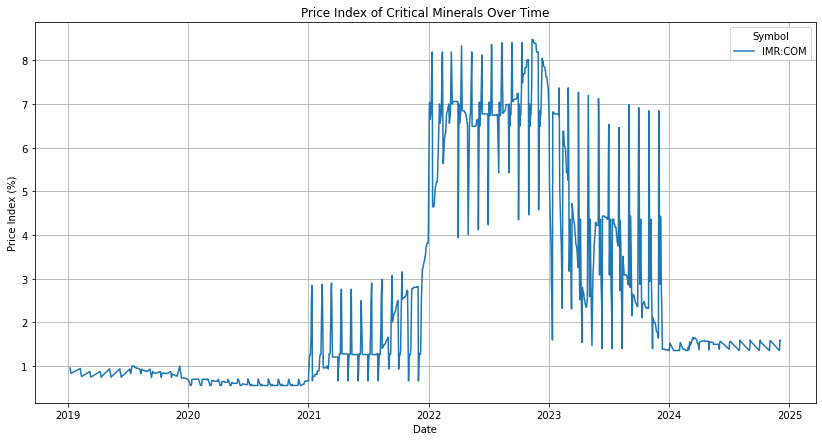

In [161]:
# Ensure the 'Date' is in the DataFrame and sort by 'Date'
result_df['Date'] = pd.to_datetime(result_df.index)  # In case it's not already converted
result_df.sort_index(inplace=True)  # Sorting the DataFrame by the 'Date' index

# Plotting the Price Index for each symbol
fig, ax = plt.subplots(figsize=(14, 7))  # Creates a figure and a grid of subplots with a single subplot

# for symbol in symbols:
data_to_plot = result_df[result_df['Symbol'] == 'LC:COM']
ax.plot(data_to_plot.index, data_to_plot['Price Index'], label=symbol)

ax.set_title('Price Index of Critical Minerals Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price Index (%)')
ax.legend(title='Symbol')
plt.grid(True)
plt.show()

In [125]:
data_to_plot.head(20)

,Symbol,Open,High,Low,Close,Price Index,Date
Date,,,,,,,
2019-01-08,LC:COM,67000.0,68500.0,65500.0,67000.0,95.035461,2019-01-08
2019-01-11,LC:COM,58500.0,60000.0,57000.0,58500.0,82.978723,2019-01-11
2019-02-08,LC:COM,66500.0,68000.0,65000.0,66500.0,94.326241,2019-02-08
2019-02-09,LC:COM,61500.0,63000.0,60000.0,61500.0,87.234043,2019-02-09
2019-02-12,LC:COM,53500.0,55000.0,52000.0,53500.0,75.886525,2019-02-12
2019-03-09,LC:COM,61500.0,63000.0,60000.0,61500.0,87.234043,2019-03-09
2019-03-12,LC:COM,52500.0,54000.0,51000.0,52500.0,74.468085,2019-03-12
2019-04-09,LC:COM,61500.0,63000.0,60000.0,61500.0,87.234043,2019-04-09
2019-04-11,LC:COM,58000.0,59500.0,56500.0,58000.0,82.269504,2019-04-11


Treemap for Critical Mineral Annual Percentage Change

In [129]:
commodities_data = te.getMarketsData(marketsField='commodities', output_type='df') 
commodities = commodities_data.rename(columns={'YearlyPercentualChange': 'Year%Change'})
commodities['Name'] = commodities['Name'].str.replace("Index", "")
fig = px.treemap(commodities, path=[px.Constant("Commodities"),'Group', 'Name'], color='Year%Change', color_continuous_scale='rdylgn',color_continuous_midpoint=0)
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),autosize=False,
    width=1200,
    height=700
)
fig.update_traces(hovertemplate='%{label}<br>Year % Change= %{customdata[0]}%<extra></extra>')
fig.show()

In [139]:
critical_minerals = [
    'Iron Ore',  # Assuming 'Iron Ore' maps to 'SCO:COM'
    'Steel',     # Assuming 'Steel' maps to 'JBP:COM'
    'Aluminum',  # Assuming 'Aluminum' maps to 'LMAHDS03:COM'
    'Lithium',   # Assuming 'Lithium' maps to 'LC:COM'
    'Cobalt',    # Assuming 'Cobalt' maps to 'LCO1:COM'
    'Nickel',    # Assuming 'Nickel' maps to 'LN1:COM'
    'Copper',    # Assuming 'Copper' maps to 'HG1:COM'
    'Manganese'  # Assuming 'Manganese' maps to 'IMR:COM'
]

filtered_commodities = commodities[commodities['Name'].isin(critical_minerals)]
# Create a treemap visualization
fig_cm = px.treemap(
    filtered_commodities,
    path=[px.Constant("Commodities"), 'Group', 'Name'],
    color='Year%Change',
    color_continuous_scale='RdYlGn',
    color_continuous_midpoint=0
)
fig_cm.update_traces(hovertemplate='%{label}<br>Year % Change= %{customdata[0]}%<extra></extra>')
fig_cm.show()


Imports and Exports

In [147]:
raw_lithium = te.fetchMarkets(symbol=['LC:COM'], initDate='2017-01-01', endDate=pd.Timestamp.today().strftime('%Y-%m-%d'), output_type='df')
raw_lithium

,Symbol,Date,Open,High,Low,Close
0,LC:COM,10/05/2017,136000.0,140000.0,132000.0,136000.0
1,LC:COM,11/05/2017,136000.0,140000.0,132000.0,136000.0
2,LC:COM,12/05/2017,136000.0,140000.0,132000.0,136000.0
3,LC:COM,15/05/2017,136000.0,140000.0,132000.0,136000.0
4,LC:COM,16/05/2017,136000.0,140000.0,132000.0,136000.0
...,...,...,...,...,...,...
1745,LC:COM,28/05/2024,105500.0,107000.0,104000.0,105500.0
1746,LC:COM,29/05/2024,105500.0,107000.0,104000.0,105500.0
1747,LC:COM,30/05/2024,105500.0,107000.0,104000.0,105500.0
1748,LC:COM,31/05/2024,105500.0,107000.0,104000.0,105500.0


In [158]:
# Fetch export data for Lithium
raw_lithium = te.fetchMarkets(symbol=['LC:COM'], initDate='2016-01-01', endDate=pd.Timestamp.today().strftime('%Y-%m-%d'), output_type='df')
raw_lithium# raw_exports = te.getCmtHistorical(symbol='LC:COM', output_type='df')
# raw_imports = te.getCmtHistorical(symbol='LC:COM', output_type='df')

# # Processing exports and imports data
# imports = raw_imports[['value', 'date']].rename(columns={'value': 'imports'})
# imports['Date'] = pd.to_datetime(imports['date'])
# imports.set_index('Date', inplace=True)
# del imports['date']

# exports = raw_exports[['value', 'date']].rename(columns={'value': 'exports'})
# exports['Date'] = pd.to_datetime(exports['date'])
# exports.set_index('Date', inplace=True)
# del exports['date']


,Symbol,Date,Open,High,Low,Close
0,LC:COM,10/05/2017,136000.0,140000.0,132000.0,136000.0
1,LC:COM,11/05/2017,136000.0,140000.0,132000.0,136000.0
2,LC:COM,12/05/2017,136000.0,140000.0,132000.0,136000.0
3,LC:COM,15/05/2017,136000.0,140000.0,132000.0,136000.0
4,LC:COM,16/05/2017,136000.0,140000.0,132000.0,136000.0
...,...,...,...,...,...,...
1745,LC:COM,28/05/2024,105500.0,107000.0,104000.0,105500.0
1746,LC:COM,29/05/2024,105500.0,107000.0,104000.0,105500.0
1747,LC:COM,30/05/2024,105500.0,107000.0,104000.0,105500.0
1748,LC:COM,31/05/2024,105500.0,107000.0,104000.0,105500.0
